**Importing Libraries and loading data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data sets/BlackFridaySales.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df.shape

(550068, 12)

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


**Checking Null values**

In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


**Unique Element in each attributes**

In [ ]:
df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category_1,20
Product_Category_2,17


**EDA**

**Purchase**

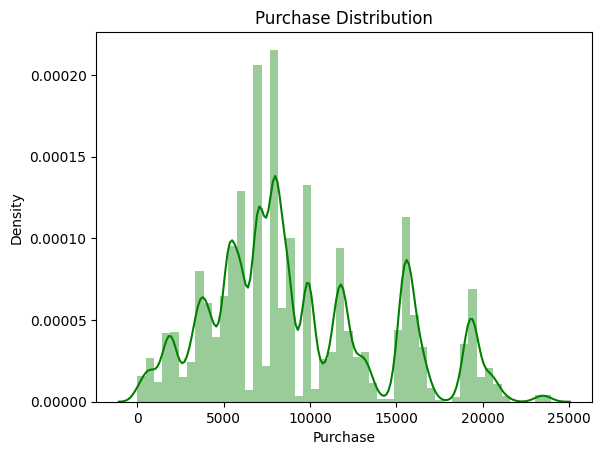

In [ ]:
sns.distplot(df['Purchase'],color ='g')
plt.title("Purchase Distribution")
plt.show()

we can see that the above one is normally distributed

**Checking For Outliers**

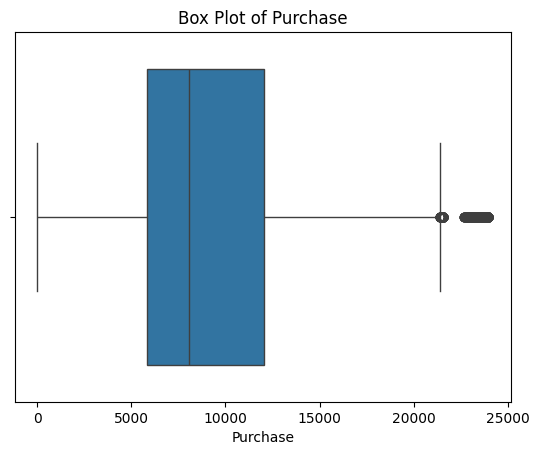

In [ ]:
sns.boxplot(x= df['Purchase'])
plt.title("Box Plot of Purchase")
plt.show()

In [ ]:
df["Purchase"].skew()

0.6001400037087128

In [ ]:
df['Purchase'].kurtosis()

-0.3383775655851702

In [ ]:
df["Purchase"].describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


The purchase is right skewed and we can observe multiple peaks in the distribution we can do a log transformation for the purchase.

**Gender**

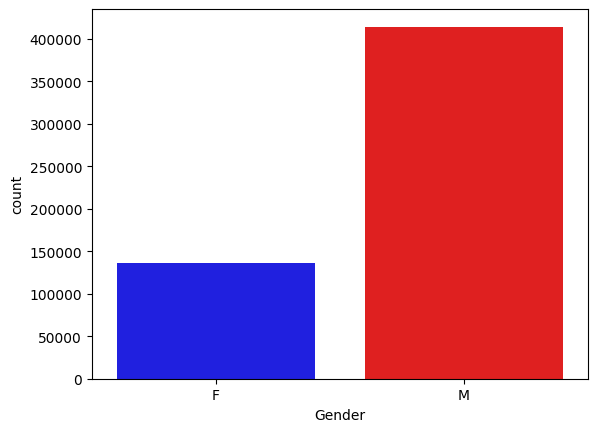

In [ ]:
sns.countplot(x =df["Gender"],palette=['b','r'])
plt.show()

In [ ]:
df['Gender'].value_counts(normalize=True)*100

,proportion
Gender,
M,75.310507
F,24.689493


In [ ]:
df.groupby('Gender')["Purchase"].mean()

,Purchase
Gender,
F,8734.565765
M,9437.526040


**Marital Status**

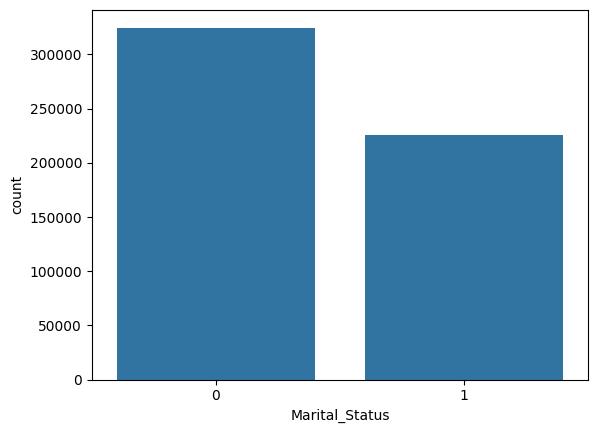

In [ ]:
sns.countplot(x = df['Marital_Status'])
plt.show()

In [ ]:
df.groupby("Marital_Status")['Purchase'].mean()

,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


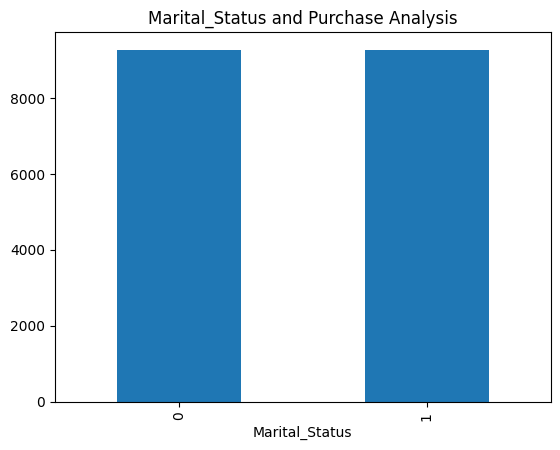

In [ ]:
df.groupby("Marital_Status")['Purchase'].mean().plot(kind = 'bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

This is interesting though unmarried people spend more on purchasing, the average purchase amount of married and unmarried people are the same.

**Occupation**

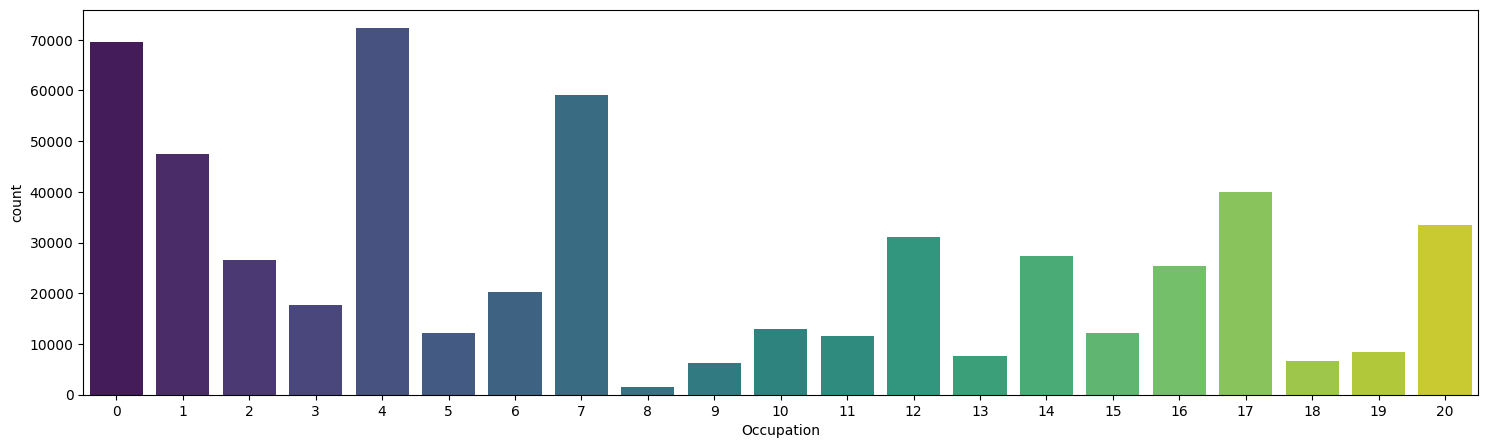

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(x =df['Occupation'],palette='viridis')
plt.show()

In [ ]:
occup = pd.DataFrame(df.groupby("Occupation")["Purchase"].mean())
occup

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


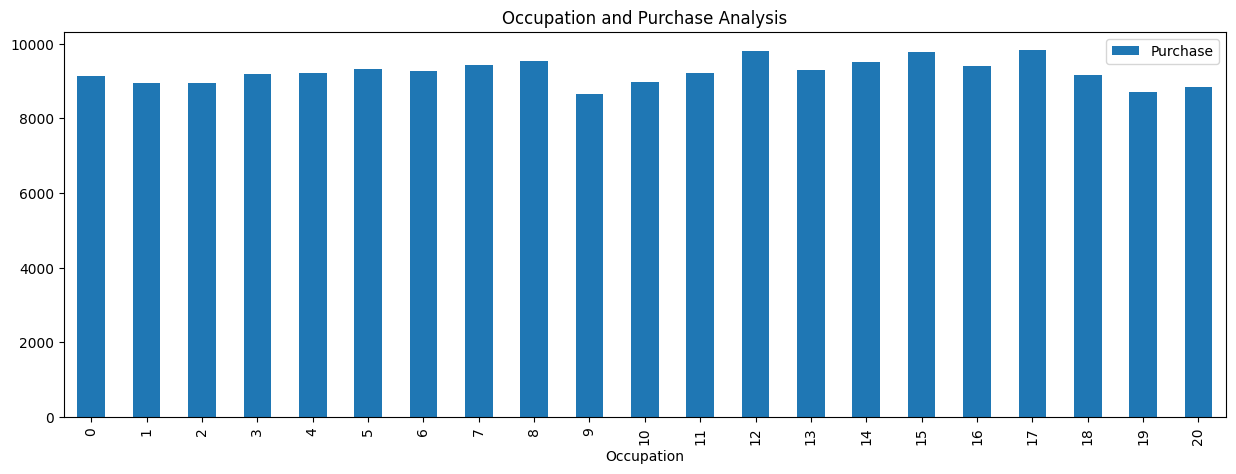

In [ ]:
occup.plot(kind ='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

**City Category**

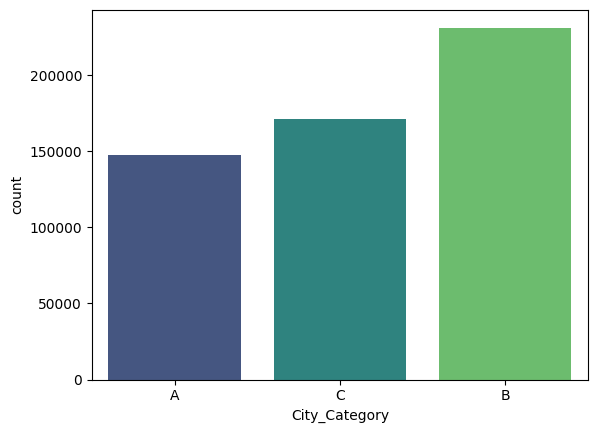

In [ ]:
sns.countplot(x = df['City_Category'],palette='viridis')
plt.show()

It is observed that city category B has made the most number of puchases.

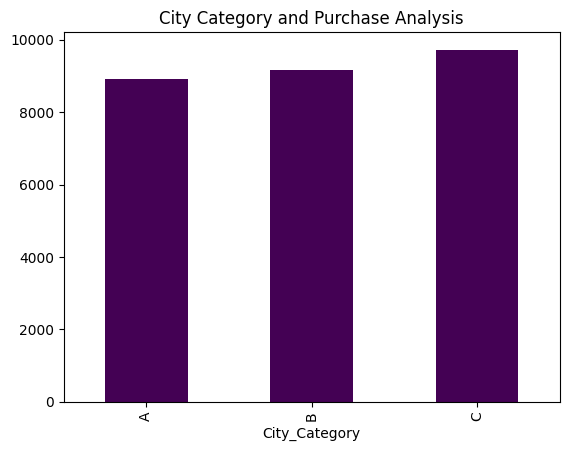

In [ ]:
df.groupby("City_Category")['Purchase'].mean().plot(kind ='bar',colormap ='viridis')
plt.title("City Category and Purchase Analysis")
plt.show()

city type c spends the most

**Stay_In_Current_City_Years**

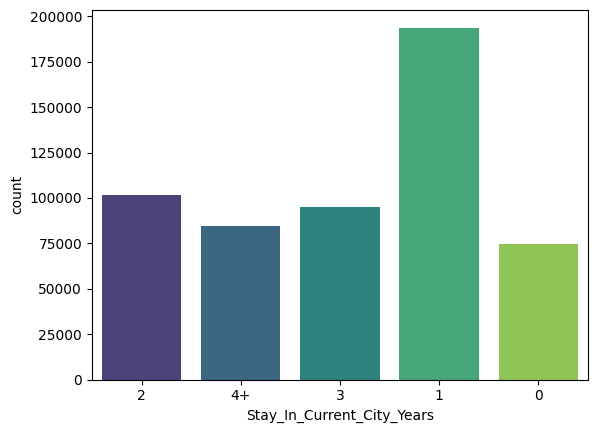

In [ ]:
sns.countplot(x = df['Stay_In_Current_City_Years'], palette ='viridis')
plt.show()

The people who have lived in a city for a longer time are less likely to buy new items. In contrast, newcomers to a city, who may need to furnish their homes, are more likely to take advantage of Black Friday deals to purchase what they need at lower prices.

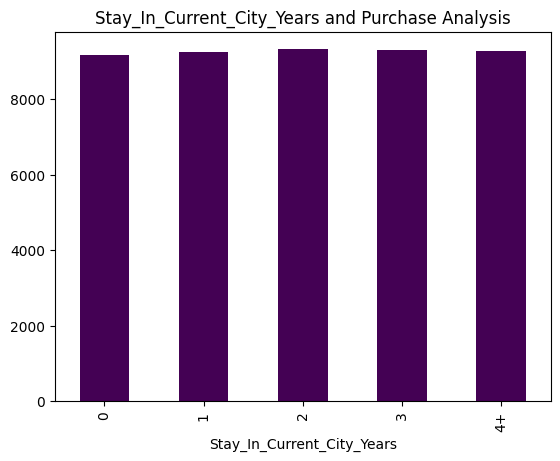

In [ ]:
df.groupby("Stay_In_Current_City_Years")['Purchase'].mean().plot(kind = 'bar',colormap = 'viridis')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

People spend about the same amount on purchases, regardless of how long they've lived in the city, even though newcomers make more purchases overall.

**Age**

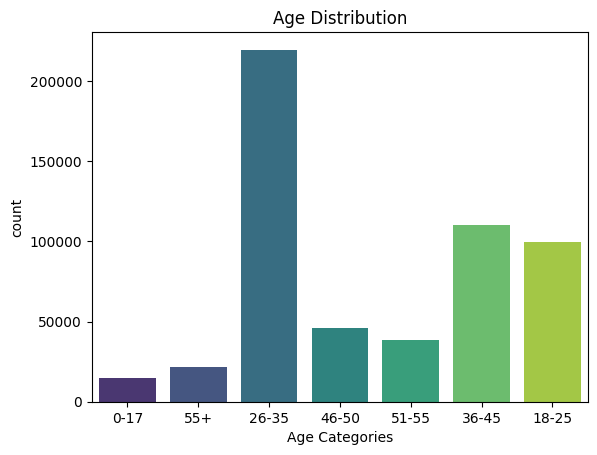

In [ ]:
sns.countplot(x = df['Age'],palette='viridis')
plt.title("Age Distribution")
plt.xlabel("Age Categories")
plt.show()

Age 26-35 group  makes the most no of purchases in the group

<Axes: xlabel='Age'>

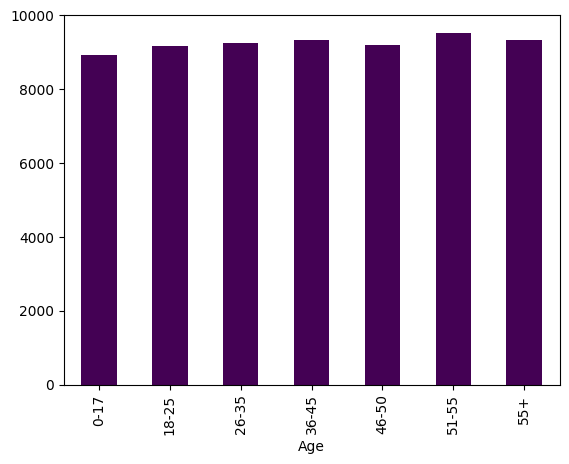

In [ ]:
df.groupby("Age")['Purchase'].mean().plot(kind ='bar',colormap ='viridis')

Mean puchase rate between the age groups tends to be the same except that the 51-55 age group has a little higher average purchase amount

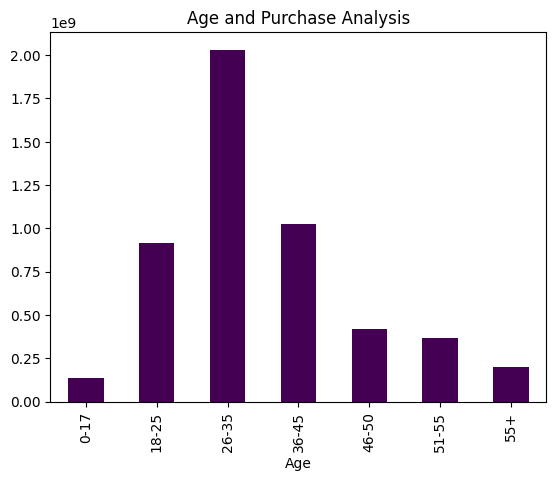

In [ ]:
df.groupby('Age')['Purchase'].sum().plot(kind = 'bar',colormap = 'viridis')
plt.title("Age and Purchase Analysis")
plt.show()

**Product_Category_1**

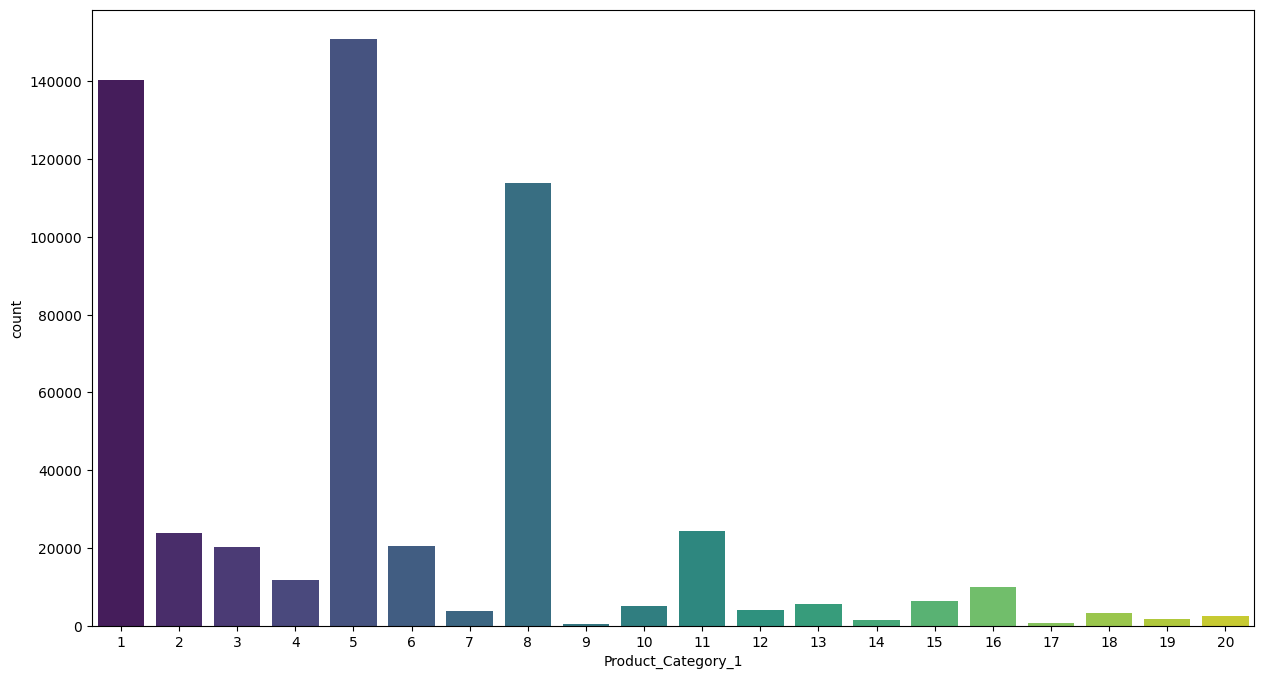

In [ ]:
plt.figure(figsize =(15,8))
sns.countplot(x = df['Product_Category_1'],palette='viridis')
plt.show()

It is clear that Product_Category_1 numbers 1,5 and 8 stand out. But we are unable to know the correct product as the product names are marked with numbers.

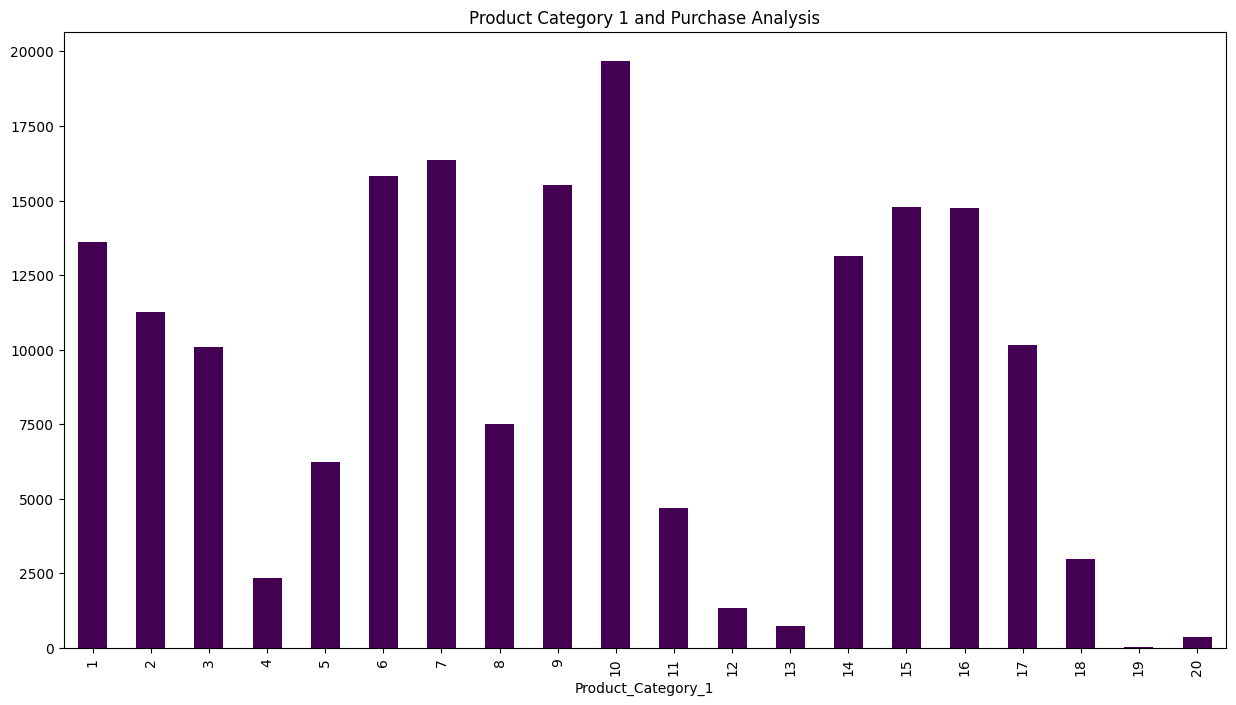

In [ ]:
df.groupby("Product_Category_1")['Purchase'].mean().plot(kind = 'bar',figsize=(15,8),colormap ='viridis')
plt.title("Product Category 1 and Purchase Analysis")
plt.show()

If you see the value spent on average for Product_Category_1 you see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

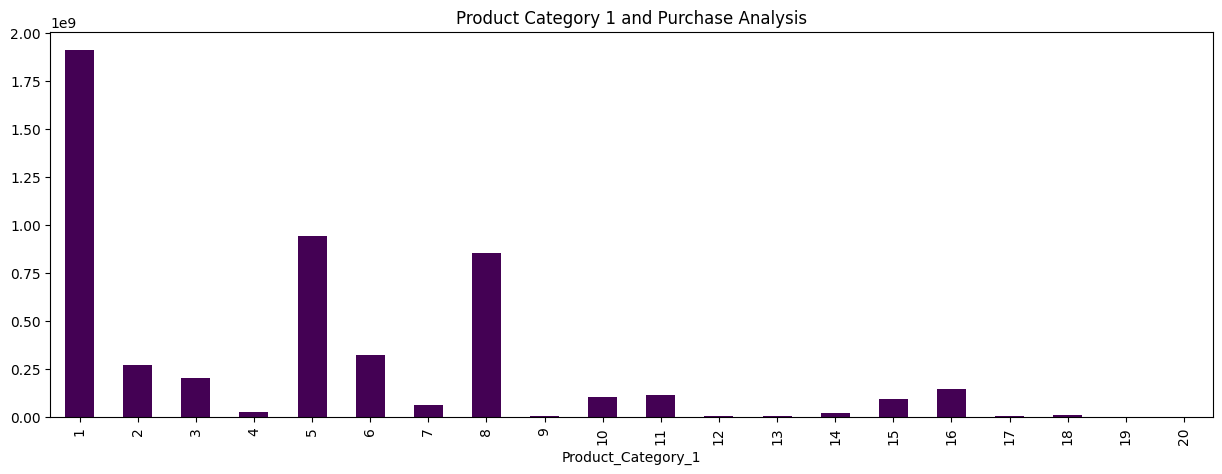

In [ ]:
df.groupby("Product_Category_1")['Purchase'].sum().plot(kind = 'bar',figsize=(15,5),colormap ='viridis')
plt.title("Product Category 1 and Purchase Analysis")
plt.show()

The distribution that we saw for this predictor previously appears here. For example, those three products have the highest sum of sales since their were three most sold products

**Product_Category_2**

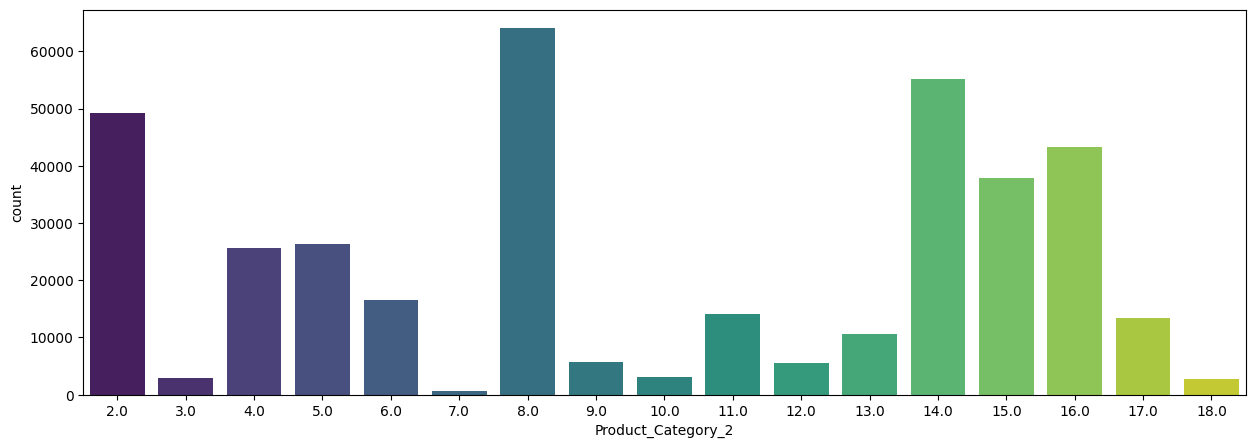

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = df['Product_Category_2'],palette='viridis')
plt.show()

**Product_Category_3**

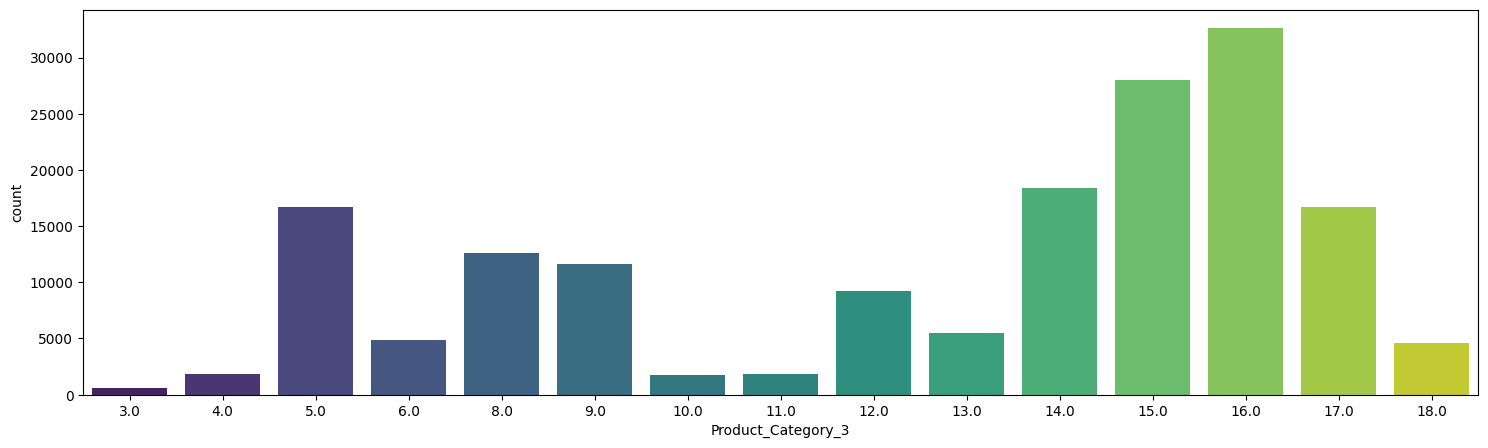

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(x = df['Product_Category_3'], palette = 'viridis')
plt.show()

**Correlation**

In [ ]:
correlation = df.corr(numeric_only=True)
correlation

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


**Heat Map**

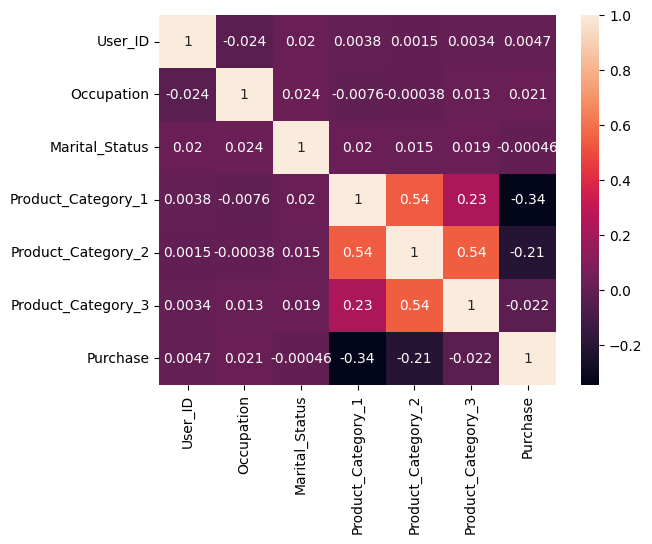

In [ ]:
sns.heatmap(correlation,annot=True)
plt.show()

In [ ]:
df1 =df.copy()

In [ ]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
#Dummy Variables:
df1 = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

**Encoding the categorical variables**

In [ ]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [ ]:
df1['Gender'] = lr.fit_transform(df1['Gender'])

In [ ]:
df1['Age'] = lr.fit_transform(df1['Age'])

In [ ]:
df1['City_Category'] = lr.fit_transform(df1['City_Category'])

**Filling Missing Values**

In [ ]:
df1['Product_Category_2'] = df1['Product_Category_2'].fillna(0).astype('int64')
df1['Product_Category_3'] = df1['Product_Category_3'].fillna(0).astype('int64')

In [ ]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,0,0,10,0,0,3,0,0,8370,False,False,True,False,False
1,1000001,P00248942,0,0,10,0,0,1,6,14,15200,False,False,True,False,False
2,1000001,P00087842,0,0,10,0,0,12,0,0,1422,False,False,True,False,False
3,1000001,P00085442,0,0,10,0,0,12,14,0,1057,False,False,True,False,False
4,1000002,P00285442,1,6,16,2,0,8,0,0,7969,False,False,False,False,True


In [ ]:
df1.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0
Product_Category_3,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   User_ID                        550068 non-null  int64 
 1   Product_ID                     550068 non-null  object
 2   Gender                         550068 non-null  int64 
 3   Age                            550068 non-null  int64 
 4   Occupation                     550068 non-null  int64 
 5   City_Category                  550068 non-null  int64 
 6   Marital_Status                 550068 non-null  int64 
 7   Product_Category_1             550068 non-null  int64 
 8   Product_Category_2             550068 non-null  int64 
 9   Product_Category_3             550068 non-null  int64 
 10  Purchase                       550068 non-null  int64 
 11  Stay_In_Current_City_Years_0   550068 non-null  bool  
 12  Stay_In_Current_City_Years_1   550068 non-nu

**Dropping Irrelevant Problem**

In [ ]:
df1 = df1.drop(["User_ID","Product_ID"],axis=1)

In [ ]:
# converting object to int
df1 = df1.astype(int)
df1.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,0,0,8370,0,0,1,0,0
1,0,0,10,0,0,1,6,14,15200,0,0,1,0,0
2,0,0,10,0,0,12,0,0,1422,0,0,1,0,0
3,0,0,10,0,0,12,14,0,1057,0,0,1,0,0
4,1,6,16,2,0,8,0,0,7969,0,0,0,0,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   Gender                         550068 non-null  int64
 1   Age                            550068 non-null  int64
 2   Occupation                     550068 non-null  int64
 3   City_Category                  550068 non-null  int64
 4   Marital_Status                 550068 non-null  int64
 5   Product_Category_1             550068 non-null  int64
 6   Product_Category_2             550068 non-null  int64
 7   Product_Category_3             550068 non-null  int64
 8   Purchase                       550068 non-null  int64
 9   Stay_In_Current_City_Years_0   550068 non-null  int64
 10  Stay_In_Current_City_Years_1   550068 non-null  int64
 11  Stay_In_Current_City_Years_2   550068 non-null  int64
 12  Stay_In_Current_City_Years_3   550068 non-null  int64
 13 

**Removing Outliers**

In [ ]:

Q1 = df1['Purchase'].quantile(0.25)
Q3 = df1['Purchase'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2 = df1[(df1['Purchase'] >= lower_bound) & (df1['Purchase'] <= upper_bound)]


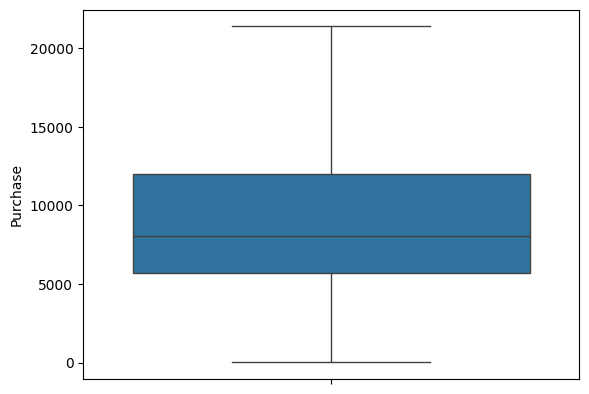

In [ ]:
sns.boxplot(df2['Purchase'])
plt.show()

**Splitting Data Into Training and Spliting**

In [ ]:
X = df2.drop("Purchase",axis=1)
y=df2['Purchase']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train.shape

(383173, 13)

In [ ]:
y_train.shape

(383173,)

**Modeling**

***Linear Regression***

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Intercept

lr.intercept_

9742.34318734949

In [ ]:
# coefficient
lr.coef_

array([ 463.941993  ,  103.66187034,    4.78032734,  310.37484933,
        -48.19593572, -379.29154683,    1.27653777,  138.22070483,
        -50.34031977,   -4.95490487,   35.58085676,   -8.29379888,
         28.00816676])

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
mean_absolute_error(y_test,y_pred)

3441.8393655174796

In [ ]:
mean_squared_error(y_test,y_pred)

20278199.711490028

In [ ]:
r2_score(y_test,y_pred)

0.16800041008089894

In [ ]:
from math import sqrt
print("RMSE of Linear Regression Model :",sqrt(mean_squared_error(y_test,y_pred)))

RMSE of Linear Regression Model : 4503.132211193674


***Decision Tree Regressor***

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
dt_y_pred = regressor.predict(X_test)

In [ ]:
mean_absolute_error(y_test,dt_y_pred)

2354.5604541432353

In [ ]:
mean_squared_error(y_test,dt_y_pred)

11102006.618965754

In [ ]:
r2_score(y_test,dt_y_pred)

0.5444928501702809

In [ ]:
print("RMSE of Decision Tree Regressor Model: ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Decision Tree Regressor Model:  3331.967379637105


***Random Forest Regressor***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=10,random_state=0)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
rf_y_pred = rf_regressor.predict(X_test)

In [ ]:
mean_absolute_error(y_test,rf_y_pred)

2232.497180807623

In [ ]:
mean_squared_error(y_test,rf_y_pred)

9431797.194225365

In [ ]:
r2_score(y_test,rf_y_pred)

0.6130203119880892

In [ ]:
print("PMSE of Random Forest Regressor Model:",sqrt(mean_squared_error(y_test,rf_y_pred)))

PMSE of Random Forest Regressor: 3071.123116097003


***XGBoost Regressor***

In [ ]:
from xgboost.sklearn import XGBRegressor
xg_reg = XGBRegressor(learning_rate = 1.0,max_depth = 6,min_chlid_weight = 40,seed = 0)
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, min_chlid_weight=40, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xg_y_pred = xg_reg.predict(X_test)

In [ ]:
mean_absolute_error(y_test,xg_y_pred)

2128.1937221282715

In [ ]:
mean_squared_error(y_test,xg_y_pred)

8136959.090089181

In [ ]:
r2_score(y_test,xg_y_pred)

0.666146565155549

In [ ]:
print("RMSE of XGBoost Regressor Model:",sqrt(mean_squared_error(y_test,xg_y_pred)))

RMSE of XGBoost Regressor Model: 2852.5355545705615


We can see that XGBoost regressor has the minimum Root Mean Squred Error Value (2853) . Therefore XGBoost is the best ML algorithm